In [1]:
import torch
from dpm.models import QuadraticDiscriminantAnalysis
from dpm.distributions import Normal
from dpm.visualize import plot_stats, plot_models, plot_model, plot_hist

In [2]:
y = torch.cat((torch.zeros(1000), torch.ones(2000))).view(-1, 1)
y.shape

torch.Size([3000, 1])

In [3]:
x_model_0 = Normal(torch.zeros(10)+4., torch.eye(10)*2 + 4)
x_model_1 = Normal(torch.zeros(10)-2, torch.eye(10)*5 - 0.2)
# plot_models(x_model_0, x_model_1)
x = torch.cat((x_model_0.sample(1000).detach(), x_model_1.sample(2000).detach()), dim=0)
x.shape

torch.Size([3000, 10])

In [4]:
model = QuadraticDiscriminantAnalysis(n_features=10)

In [5]:
model.log_prob(x, y)

tensor([-118.0189,  -55.5940,  -24.0634,  ...,  -61.1685,  -67.9347,
         -37.5590], grad_fn=<SumBackward2>)

In [6]:
stats = model.fit(x, y)

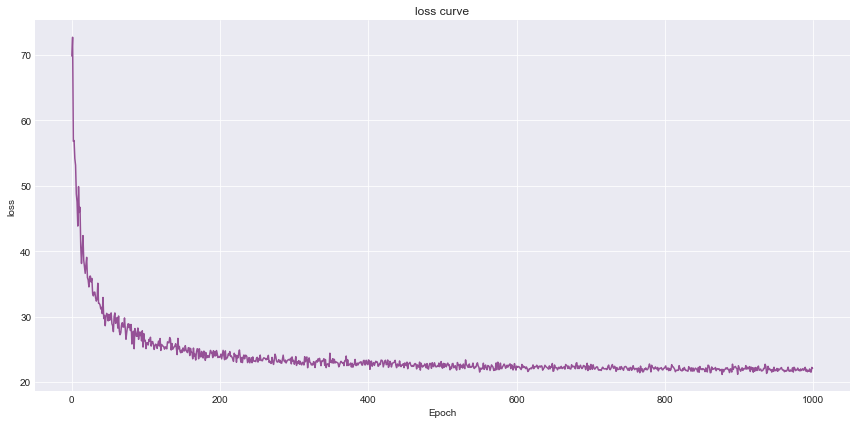

In [7]:
plot_stats(stats)

In [8]:
model.y_dist.probs

tensor([0.3343, 0.6657], grad_fn=<SoftmaxBackward>)

In [9]:
(model.predict(x) == y.long()).float().mean()

tensor(0.9913)

In [10]:
model.x_dist[0].loc

Parameter containing:
tensor([2.0605, 1.6125, 2.0175, 2.0030, 2.0786, 1.9506, 2.1306, 2.1187, 2.0718,
        1.8536], requires_grad=True)

In [11]:
model.x_dist[1].loc

Parameter containing:
tensor([-2.0896, -1.6298, -1.8030, -1.5938, -2.1085, -2.0891, -2.1358, -2.0640,
        -1.9675, -1.9104], requires_grad=True)

In [12]:
X = model.sample(5)
print(X)

tensor([[-2.2407, -3.7683, -4.9923, -2.8729,  0.9690,  1.6930, -3.6086,  0.5255,
          0.1026,  1.8459],
        [ 0.1907, -0.0324, -0.4649, -2.0465, -3.4169, -0.9718, -2.6415, -2.1409,
         -6.2985,  0.4132],
        [-1.5347, -4.2227, -2.3660, -4.4563, -2.5900, -3.4852, -2.9693, -0.4575,
          0.3371, -2.4806],
        [-0.7676,  1.3077,  2.0336, -2.1215,  1.0029, -5.9438, -3.5261,  1.4133,
         -4.4030, -3.1445],
        [-1.6876, -2.4543, -2.1467, -3.8513, -2.5392, -2.0694,  1.2372, -1.3344,
         -0.0097, -2.6601]], grad_fn=<IndexBackward>)


In [13]:
model.predict(X)

tensor([[1],
        [1],
        [1],
        [1],
        [1]])

In [14]:
model.x_dist[1].scale

tensor([[ 4.8271, -0.2284, -0.2387, -0.2892, -0.2334, -0.1624, -0.2806, -0.2554,
         -0.3081, -0.2971],
        [-0.2284,  5.4435,  0.3122,  0.5270, -0.5916, -0.4028, -0.4279, -0.5521,
         -0.1842, -0.0877],
        [-0.2387,  0.3122,  5.2782,  0.4353, -0.3027, -0.3857, -0.2688, -0.4375,
         -0.2951, -0.1065],
        [-0.2892,  0.5270,  0.4353,  5.6742, -0.5079, -0.3579, -0.2281, -0.5010,
         -0.2795, -0.0142],
        [-0.2334, -0.5916, -0.3027, -0.5079,  4.7178, -0.0119, -0.2047,  0.1530,
         -0.2443, -0.0995],
        [-0.1624, -0.4028, -0.3857, -0.3579, -0.0119,  5.2131, -0.3003, -0.1604,
         -0.2430,  0.0520],
        [-0.2806, -0.4279, -0.2688, -0.2281, -0.2047, -0.3003,  5.0402,  0.1338,
         -0.0981, -0.3410],
        [-0.2554, -0.5521, -0.4375, -0.5010,  0.1530, -0.1604,  0.1338,  4.7858,
         -0.1271, -0.0347],
        [-0.3081, -0.1842, -0.2951, -0.2795, -0.2443, -0.2430, -0.0981, -0.1271,
          4.9887, -0.2695],
        [-0.2971, -

In [15]:
# plot_hist(model.sample(5000).detach())

In [15]:
model.sample(2)

tensor([[-2.3491, -0.6813,  2.1640,  2.4789, -0.7653, -3.4922, -3.7333,  3.9133,
         -5.8485, -0.3242],
        [-3.4102, -0.3727, -4.2131, -3.4577, -3.5810,  0.6765, -2.8616,  0.4604,
         -1.7591, -0.4902]], grad_fn=<IndexBackward>)

In [20]:
x_s, y_s = model.sample(2, return_y=True)
x_s.shape, y_s.shape

(torch.Size([2, 10]), torch.Size([2, 1]))

In [23]:
model.predict(x_s)

tensor([[0],
        [1]])